# EM CONSTRUÇÃO

In [319]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

http://courses.washington.edu/hcde511/a14/datasets/cars.xls

### Load Data

In [320]:
cars_data = pd.read_csv("datasets/cars.csv")

cars_data.sample(5)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
385,ford granada l,22.0,6,232.0,112,2835,14.7,1982,US,2.99,3.47,21.9
45,chevrolet vega (sw),22.0,4,140.0,72,2408,19.0,1971,"US; Detroit, Michigan]",3.03,3.11,9.6
379,honda civic,38.0,4,91.0,67,1965,15.0,1982,Japan,3.59,3.86,7.0
65,amc ambassador sst,17.0,8,304.0,150,3672,11.5,1972[1973],US,3.76,3.16,8.0
329,vokswagen rabbit,29.8,4,89.0,62,1845,15.3,1980,Europe,2.91,3.41,9.2


In [321]:
cars_data.shape

(394, 12)

In [322]:
cars_data.describe()

,MPG,Displacement,Horsepower,Weight,Acceleration,bore,stroke,compression-ratio
count,385.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,23.551429,194.062183,104.337563,2976.060914,15.532995,3.305025,3.289289,10.358680
std,7.821598,104.508345,38.449600,847.891143,2.763637,0.270336,0.271165,4.326202
min,9.000000,68.000000,46.000000,1613.000000,8.000000,2.540000,2.070000,3.390000
25%,17.500000,105.000000,75.000000,2226.500000,13.725000,3.080000,3.150000,8.525000
50%,23.000000,151.000000,92.500000,2803.500000,15.500000,3.270000,3.350000,9.000000
75%,29.000000,265.750000,125.000000,3612.000000,17.000000,3.580000,3.400000,9.400000
max,46.600000,455.000000,230.000000,5140.000000,24.800000,3.940000,4.170000,23.000000


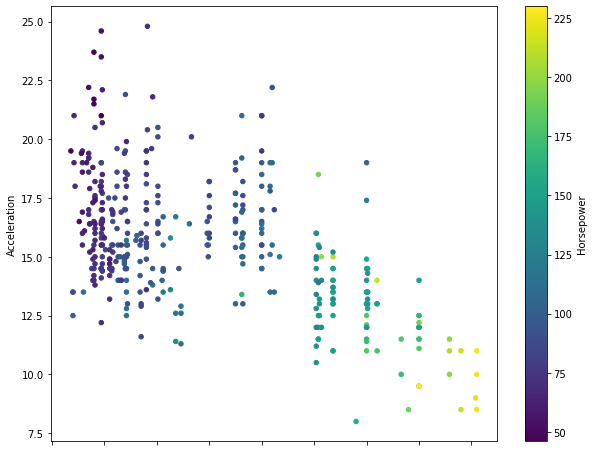

In [323]:
cars_data.plot.scatter(x='Displacement',
                  y='Acceleration',
                  c='Horsepower',
                  colormap='viridis',
                  figsize=(10, 8));

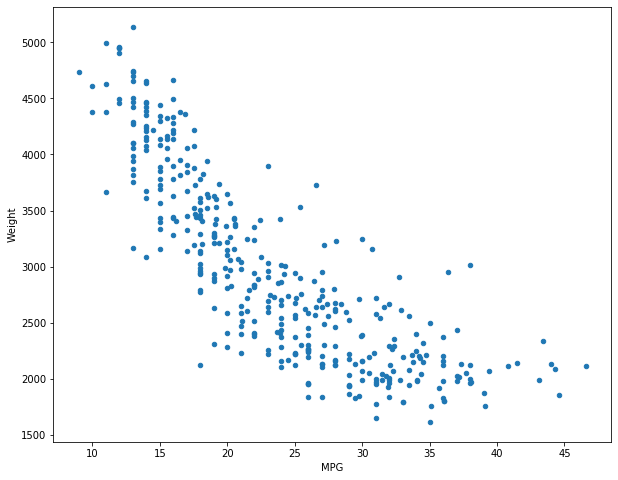

In [324]:
cars_data.plot.scatter(x='MPG',
                  y='Weight',
                  figsize=(10, 8));

In [325]:
cars_corr = cars_data.corr()

cars_corr

,MPG,Displacement,Horsepower,Weight,Acceleration,bore,stroke,compression-ratio
MPG,1.000000,-0.807249,-0.777334,-0.831705,0.408534,-0.124381,0.039573,-0.062372
Displacement,-0.807249,1.000000,0.897507,0.932813,-0.540477,0.055402,-0.000635,0.014827
Horsepower,-0.777334,0.897507,1.000000,0.864566,-0.680107,0.000265,0.029495,0.010691
Weight,-0.831705,0.932813,0.864566,1.000000,-0.408917,0.058966,0.011390,0.030215
Acceleration,0.408534,-0.540477,-0.680107,-0.408917,1.000000,0.056338,-0.024609,0.026392
bore,-0.124381,0.055402,0.000265,0.058966,0.056338,1.000000,-0.093581,-0.123112
stroke,0.039573,-0.000635,0.029495,0.011390,-0.024609,-0.093581,1.000000,0.175033
compression-ratio,-0.062372,0.014827,0.010691,0.030215,0.026392,-0.123112,0.175033,1.000000


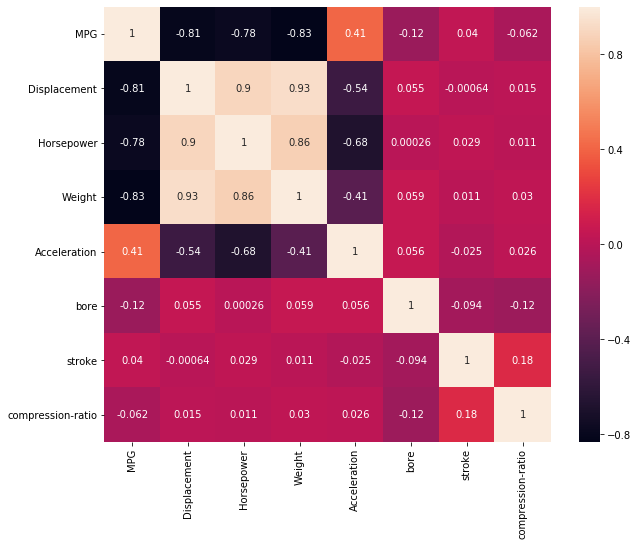

In [326]:
fig, ax = plt.subplots(figsize = (10, 8))

sns.heatmap(cars_corr, annot = True)

In [327]:
cars_data.dtypes

Model                 object
MPG                  float64
Cylinders             object
Displacement         float64
Horsepower             int64
Weight                 int64
Acceleration         float64
Year                  object
Origin                object
bore                 float64
stroke               float64
compression-ratio    float64
dtype: object

# Cleaning the dataset

## Checking whether all the column names are unique

In [328]:
column_names = cars_data.columns
column_names

Index(['Model', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Year', 'Origin', 'bore', 'stroke',
       'compression-ratio'],
      dtype='object')

In [329]:
column_names.is_unique

True

## Dealing with null values

In [330]:
cars_data.isnull().any()

Model                False
MPG                   True
Cylinders            False
Displacement         False
Horsepower           False
Weight               False
Acceleration         False
Year                 False
Origin               False
bore                 False
stroke               False
compression-ratio    False
dtype: bool

In [331]:
cars_data.isnull().sum()

Model                0
MPG                  9
Cylinders            0
Displacement         0
Horsepower           0
Weight               0
Acceleration         0
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    0
dtype: int64

In [332]:
cars_data['MPG'] = cars_data['MPG'].fillna(cars_data['MPG'].mean())

In [333]:
cars_data.isnull().sum()

Model                0
MPG                  0
Cylinders            0
Displacement         0
Horsepower           0
Weight               0
Acceleration         0
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    0
dtype: int64

## Dropping unnecessary columns

In [334]:
to_drop = [ 'bore',
            'stroke',
            'compression-ratio']

In [335]:
cars_data.drop(to_drop, inplace=True, axis=1)
cars_data.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,1970[1975],"US; Detroit, Michigan"
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,1970,US]
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,"1970, 1976",US
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,1970,US
4,ford torino,17.0,8,302.0,140,3449,10.5,1970-1972,US]


## Changing datatypes
* `Year` and `Cylinder` should be integers but they are stored as objects

In [336]:
cars_data['Year'].head(10)

0    1970[1975]
1          1970
2    1970, 1976
3          1970
4     1970-1972
5          1970
6    1970[1975]
7          1970
8          1970
9          1970
Name: Year, dtype: object

In [337]:
cars_data['Year'].str.isnumeric().value_counts()

True     357
False     37
Name: Year, dtype: int64

In [338]:
cars_data['Year'].loc[cars_data['Year'].str.isnumeric() == False]

0          1970[1975]
2          1970, 1976
4           1970-1972
6          1970[1975]
30      1971[1973]971
35         1971[1973]
40         1971[1973]
44         1971[1973]
49         1971[1973]
56         1972[1973]
61         1972[1973]
65         1972[1973]
68         1972[1973]
73         1972[1973]
75            1972-73
79            1972-73
82            1972-73
96          1973-1974
97         1973, 1974
102    1973, 19741973
105        1973, 1974
108        1973, 1974
112        1973, 1974
115        1973, 1974
126        1974, 1975
131        1974, 1975
134        1974, 1975
137        1974, 1975
139    1974, 19751974
142        1974, 1975
365         1982-1985
374         1982-1985
380         1982-1985
383         1982-1985
387         1982-1985
389         1982-1985
391         1982-1985
Name: Year, dtype: object

### Only the first year need to be included

* The given formats for the `Year` column 1970[1971]; 1970-1972; 1970, 1972
* Use the following regex which will convert all the year format to only first model manufacturinng year i,e the regex will return only first four digits

In [339]:
extr = cars_data['Year'].str.extract(r'^(\d{4})', expand=False)
extr.head()

0    1970
1    1970
2    1970
3    1970
4    1970
Name: Year, dtype: object

In [340]:
cars_data['Year'].isnull().values.any()

False

In [341]:
cars_data['Year'] = pd.to_numeric(extr)
cars_data['Year'].dtype

dtype('int64')

* We can now visualise `Year` to glean info

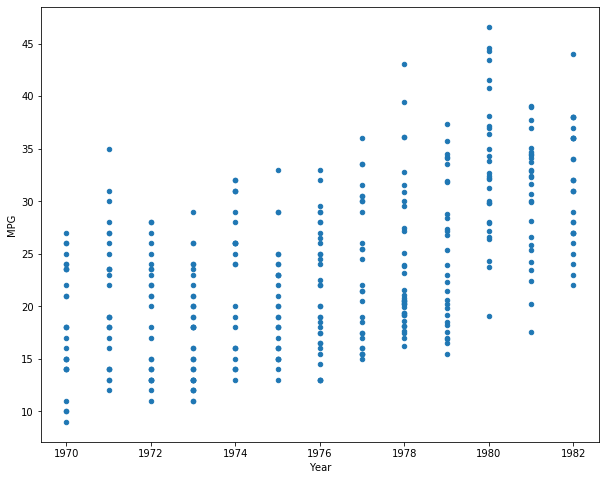

In [342]:
cars_data.plot.scatter(x='Year',
                  y='MPG',
                  figsize=(10, 8));

#### Checking for null values

In [343]:
cars_data['Cylinders'].isnull().values.any()

False

#### Checking for any presents of string

In [344]:
cars_data['Cylinders'].str.isnumeric().value_counts()

True     385
False      9
Name: Cylinders, dtype: int64

In [345]:
cars_data['Cylinders'].loc[cars_data['Cylinders'].str.isnumeric() == False]

11    -
22    -
32    -
42    -
51    -
58    -
69    -
82    -
89    -
Name: Cylinders, dtype: object

In [346]:
cylinders = cars_data['Cylinders'].loc[cars_data['Cylinders'] != '-']

In [347]:
cmean = cylinders.astype(int).mean()

In [348]:
cars_data['Cylinders'] = cars_data['Cylinders'].replace('-', cmean).astype(int)

In [349]:
cars_data.dtypes

Model            object
MPG             float64
Cylinders         int64
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Year              int64
Origin           object
dtype: object

## Formatting data
* It can be noticed that the `Origin` Column needs to be cleaned

In [350]:
cars_data.head(5)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,1970,"US; Detroit, Michigan"
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,1970,US]
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,1970,US
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,1970,US
4,ford torino,17.0,8,302.0,140,3449,10.5,1970,US]


In [351]:
cars_data['Origin'].head(15)

0     US; Detroit, Michigan
1                       US]
2                        US
3                        US
4                       US]
5                        US
6     US; Detroit, Michigan
7                        US
8                        US
9                       US]
10                       US
11                       US
12    US; Detroit, Michigan
13                       US
14             Japan; Aichi
Name: Origin, dtype: object

* We can see differnt format of `US` and `Japan` 

In [352]:
cars_data.loc[276]

Model           volkswagen scirocco
MPG                            31.5
Cylinders                         4
Displacement                     89
Horsepower                       71
Weight                         1990
Acceleration                   14.9
Year                           1978
Origin               Europe-Germany
Name: 276, dtype: object

In [353]:
cars_data.loc[272]

Model                audi 5000
MPG                       20.3
Cylinders                    5
Displacement               131
Horsepower                 103
Weight                    2830
Acceleration              15.9
Year                      1978
Origin          Europe Germany
Name: 272, dtype: object

* Two different formats of `Europe Germeny`

In [354]:
cars_data['Origin'].unique()

array(['US; Detroit, Michigan', 'US]', 'US', 'Japan; Aichi',
       'Europe-Germany', 'Europe', 'Japan; Tokyo', 'Japan; Aichi]',
       'US; Detroit, Michigan]', 'Japan; Tokyo]', 'Japan',
       'Europe Germany'], dtype=object)

#### Get a boolean Mask for the Place of Origin 'US'

In [355]:
us = cars_data['Origin'].str.contains('US')

In [356]:
us[:15]

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13     True
14    False
Name: Origin, dtype: bool

### `Three level nesting with np.where`
`.where()` takes each element in the object used for condition, checks whether that particular element evaluates to True in the context of the condition, and returns an ndarray containing then or else, depending on which applies.

np.where(if_this_condition_is_true_one, do_this, 
  np.where(if_this_condition_is_true_two, do_that, 
    np.where(if_this_condition_is_true_three, do_foo, do_bar)))

In [357]:
cars_data['Origin'] = np.where(cars_data['Origin'].str.contains('US'), 
                               'US', 
                               cars_data['Origin'])

In [358]:
cars_data['Origin'].unique()

array(['US', 'Japan; Aichi', 'Europe-Germany', 'Europe', 'Japan; Tokyo',
       'Japan; Aichi]', 'Japan; Tokyo]', 'Japan', 'Europe Germany'],
      dtype=object)

In [359]:
cars_data['Origin'] = np.where(cars_data['Origin'].str.contains('Japan'), 
                               'Japan', cars_data['Origin'])

cars_data['Origin'] = np.where(cars_data['Origin'].str.contains('Europe'), 
                               'Europe', cars_data['Origin'])

In [360]:
cars_data['Origin'].unique()

array(['US', 'Japan', 'Europe'], dtype=object)

In [361]:
cars_data['Origin'].unique()

array(['US', 'Japan', 'Europe'], dtype=object)

In [362]:
cars_data.loc[276]

Model           volkswagen scirocco
MPG                            31.5
Cylinders                         4
Displacement                     89
Horsepower                       71
Weight                         1990
Acceleration                   14.9
Year                           1978
Origin                       Europe
Name: 276, dtype: object

In [363]:
cars_data.sample(10)

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
386,toyota celica gt,32.0,4,144.0,96,2665,13.9,1982,Japan
361,ford granada gl,20.2,6,200.0,88,3060,17.1,1981,US
159,chevroelt chevelle malibu,16.0,6,250.0,105,3897,18.5,1975,US
372,mazda glc custom l,37.0,4,91.0,68,2025,18.2,1982,Japan
153,ford maverick,15.0,6,250.0,72,3158,19.5,1975,US
389,ford mustang gl,27.0,4,140.0,86,2790,15.6,1982,US
14,toyota corona mark ii,24.0,4,113.0,95,2372,15.0,1970,Japan
366,pontiac j2000 se hatchback,31.0,4,112.0,85,2575,16.2,1982,US
61,chevrolet impala,13.0,8,350.0,165,4274,12.0,1972,US
221,dodge monaco brougham,15.5,8,318.0,145,4140,13.7,1977,US
